In [1]:
pip list

Package                       VersionNote: you may need to restart the kernel to use updated packages.
----------------------------- --------------------
absl-py                       1.1.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
altgraph                      0.17.2
anaconda-client               1.9.0
anaconda-navigator            2.2.0
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall   

In [3]:
pip freeze

absl-py==1.1.0
aiohttp @ file:///C:/ci/aiohttp_1646806545879/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
altgraph==0.17.2
anaconda-client @ file:///C:/ci/anaconda-client_1635342752200/work
anaconda-navigator==2.2.0
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1637161053845/work
anyio @ file:///C:/ci/anyio_1644463701441/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644569878360/work
arrow @ file:///opt/conda/conda-bld/arrow_1649166651673/work
astroid @ file:///C:/ci/astroid_1628063293445/work
astropy @ file:///C:/ci/astropy_1650634250657/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
astunparse==1.6.3
async-timeout @ file:///tmp/build/80754af9/async-timeout_1637851218186/work
atomicwrites==1.4.0
attrs @ file:///opt/conda/conda-bld/attrs_1

In [4]:
from platform import python_version
print(python_version())

3.8.13


In [5]:
import cv2

In [9]:
!pip install tensorflow==2.4.1 opencv-python mediapipe sklearn matplotlib --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.4.2 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.



  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached grpcio-1.32.0-cp38-cp38-win_amd64.whl (2.6 MB)


In [4]:
!pip install mediapipe

ERROR: tensorboard 2.10.0 has requirement protobuf<3.20,>=3.9.2, but you'll have protobuf 3.20.1 which is incompatible.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.



  Found existing installation: protobuf 4.21.5
    Uninstalling protobuf-4.21.5:
      Successfully uninstalled protobuf-4.21.5


In [7]:
!pip install mediapipe

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
import mediapipe as mp

ModuleNotFoundError: No module named 'mediapipe'

In [9]:
py -m pip install mediapipe

SyntaxError: invalid syntax (2789337832.py, line 1)

In [10]:
import mediapipe as mp

ModuleNotFoundError: No module named 'mediapipe'

In [11]:
pip install mediapipe

  Using cached mediapipe-0.8.10.1-cp38-cp38-win_amd64.whl (48.7 MB)
  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-win_amd64.whl (42.5 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [12]:
pip install mediapipe --user

  Using cached mediapipe-0.8.10.1-cp38-cp38-win_amd64.whl (48.7 MB)
  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-win_amd64.whl (42.5 MB)



In [1]:
import mediapipe as mp

In [1]:
import cv2
import mediapipe as mp
import os 
from matplotlib import pyplot as plt
import time
import numpy as np

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model): 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=1)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=1)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=2, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=2, circle_radius=1)
                             ) 
                              

In [474]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [7]:
len(results.right_hand_landmarks.landmark)


AttributeError: 'NoneType' object has no attribute 'landmark'

In [325]:
draw_styled_landmarks(frame, results)

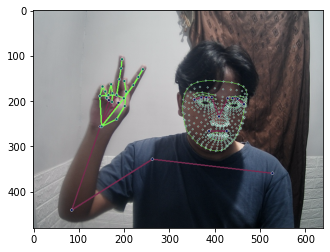

In [326]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
len(results.left_hand_landmarks.landmark)*4

84

In [11]:
results.left_hand_landmarks

landmark {
  x: 0.8886433
  y: 0.5781337
  z: 4.1393204e-07
}
landmark {
  x: 0.82389885
  y: 0.5358644
  z: -0.016954696
}
landmark {
  x: 0.7668626
  y: 0.46507365
  z: -0.022973435
}
landmark {
  x: 0.7209291
  y: 0.4153917
  z: -0.02930855
}
landmark {
  x: 0.6820132
  y: 0.3852331
  z: -0.035551082
}
landmark {
  x: 0.82129663
  y: 0.33505994
  z: 0.0018992636
}
landmark {
  x: 0.8017874
  y: 0.2461857
  z: -0.0065445835
}
landmark {
  x: 0.7898064
  y: 0.19222352
  z: -0.017307607
}
landmark {
  x: 0.7804176
  y: 0.14516225
  z: -0.027509063
}
landmark {
  x: 0.8639308
  y: 0.3263626
  z: -0.004784258
}
landmark {
  x: 0.8600243
  y: 0.22761801
  z: -0.010328698
}
landmark {
  x: 0.8588046
  y: 0.16499154
  z: -0.020714054
}
landmark {
  x: 0.85660225
  y: 0.115929276
  z: -0.030429745
}
landmark {
  x: 0.90445393
  y: 0.3388885
  z: -0.016213564
}
landmark {
  x: 0.9096838
  y: 0.249746
  z: -0.028782455
}
landmark {
  x: 0.91387933
  y: 0.19215862
  z: -0.041979183
}
landmark {

In [132]:
def extract_keypoints(results):
#     face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
#     pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    # left = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return right

In [133]:
extract_keypoints(results).shape

(63,)

In [483]:
DATA_PATH = os.path.join('data')
actions = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'])
# actions = np.array(['Y'])
no_sequences = 30
sequence_length = 30

In [479]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [480]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #loop in actions
    for action in actions:
        #loop in sequence
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                
                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                #create break
                if frame_num == 0:
                    cv2.putText(image, 'MEMULAI PENGUMPULAN..', (120, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 4, cv2.LINE_AA)
                    cv2.putText(image, 'MENGUMPULKAN DATA UNTUK {} VIDEO NOMOR {}'.format(action, sequence), (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)
                else:
                    cv2.putText(image, 'MENGUMPULKAN DATA UNTUK {} VIDEO NOMOR {}'.format(action, sequence), (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
cap.release()
cv2.destroyAllWindows()

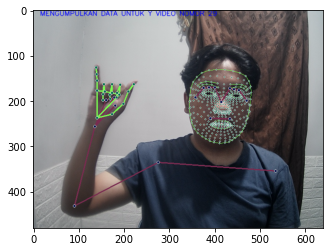

In [481]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [482]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [371]:
action_rec = np.array(['K'])

In [484]:
label_map = {label: num for num, label in enumerate(actions)}

In [485]:
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24}

In [486]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [487]:
X = np.array(sequences)

In [488]:
y = to_categorical(labels).astype(int)

In [489]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [490]:
y_test.shape

(375, 25)

In [491]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [492]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [493]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [494]:
get_acc = 0.99

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}) :
        if(logs.get('categorical_accuracy') is not None and logs.get('categorical_accuracy') >= get_acc) :
            print('\nAccuracy is 99%')
            self.model.stop_training = True

In [495]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 63)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [496]:
callbacks = myCallback()

In [497]:
X.shape

(750, 30, 63)

In [498]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [499]:
model.fit(X_train, y_train, epochs=800, callbacks=[callbacks])

Epoch 1/800
12/12 [==============================] - 8s 81ms/step - loss: 3.2208 - categorical_accuracy: 0.0537 0s - loss: 3.2211 - categorical_accura
Epoch 2/800
12/12 [==============================] - 1s 58ms/step - loss: 3.2155 - categorical_accuracy: 0.0536
Epoch 3/800
12/12 [==============================] - 1s 58ms/step - loss: 3.2067 - categorical_accuracy: 0.0874
Epoch 4/800
12/12 [==============================] - 1s 60ms/step - loss: 3.1784 - categorical_accuracy: 0.1090
Epoch 5/800
12/12 [==============================] - 1s 63ms/step - loss: 3.1982 - categorical_accuracy: 0.1108
Epoch 6/800
12/12 [==============================] - 1s 79ms/step - loss: 3.1502 - categorical_accuracy: 0.0841 1s - loss: 3.1826 - catego
Epoch 7/800
12/12 [==============================] - 1s 62ms/step - loss: 2.9904 - categorical_accuracy: 0.0907 0s - loss: 3.0065 - categorical_accura
Epoch 8/800
12/12 [==============================] - 1s 65ms/step - loss: 2.8702 - categorical_accuracy: 0.1401

In [500]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_48 (LSTM)               (None, 30, 64)            32768     
_________________________________________________________________
lstm_49 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_50 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_48 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_49 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_50 (Dense)             (None, 25)                825       
Total params: 188,057
Trainable params: 188,057
Non-trainable params: 0
_______________________________________________

In [501]:
res = model.predict(X_test)

In [502]:
actions[np.argmax(res[90])]

'A'

In [503]:
actions[np.argmax(y_test[90])]

'A'

In [504]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [505]:
yhat = model.predict(X_train)

In [506]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [507]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[363,   0],
        [  0,  12]],

       [[364,   0],
        [  0,  11]],

       [[360,   0],
        [  0,  15]],

       [[357,   0],
        [  0,  18]],

       [[356,   0],
        [  0,  19]],

       [[360,   0],
        [  0,  15]],

       [[360,   0],
        [  0,  15]],

       [[359,   0],
        [  0,  16]],

       [[355,   0],
        [  0,  20]],

       [[360,   0],
        [  0,  15]],

       [[361,   0],
        [  0,  14]],

       [[361,   0],
        [  0,  14]],

       [[364,   0],
        [  0,  11]],

       [[361,   0],
        [  0,  14]],

       [[357,   0],
        [  0,  18]],

       [[360,   0],
        [  0,  15]],

       [[363,   0],
        [  0,  12]],

       [[357,   0],
        [  0,  18]],

       [[360,   0],
        [  0,  15]],

       [[361,   0],
        [  0,  14]],

       [[361,   1],
        [  1,  12]],

       [[360,   1],
        [  1,  13]],

       [[361,   0],
        [  0,  14]],

       [[364,   0],
        [  0, 

In [508]:
accuracy_score(ytrue, yhat)

0.9946666666666667

In [462]:
from scipy import stats

In [509]:
colors = [(245,117,16), (117,245,16), (16,117,245),(245,117,16), (117,245,16), (16,117,245),(245,117,16), (117,245,16), (16,117,245), (117,245,16), (245,117,16), (117,245,16), (245,117,16), (117,245,16), (16,117,245), (245,117,16), (117,245,16), (16,117,245), (245,117,16), (117,245,16), (16,117,245), (117,245,16), (117,245,16), (16,117,245), (117,245,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [510]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.99

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [511]:
model.save('abcdefghijklnopqrstuvwxy.h5')